In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import git
import os
import json

git_repo = git.Repo(".", search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")

# Lines of Code Bar Chart

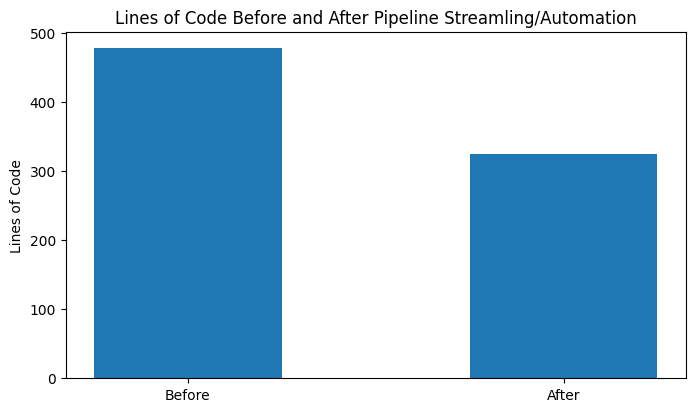

In [13]:
# Lines of code before and after
loc = [478, 325]
labels = ['Before', 'After']
title = 'Lines of Code Before and After Pipeline Streamling/Automation'

plt.figure(figsize=(8,4.5))
plt.bar(labels, loc, [0.5,0.5], align='center')
plt.title(title)
plt.ylabel("Lines of Code")
plt.savefig(os.path.join(git_root, "analysis_outputs", "reports", "preprocessing-lines-of-code.png"))

# CSR File Size as a Function of Non-zero Entries

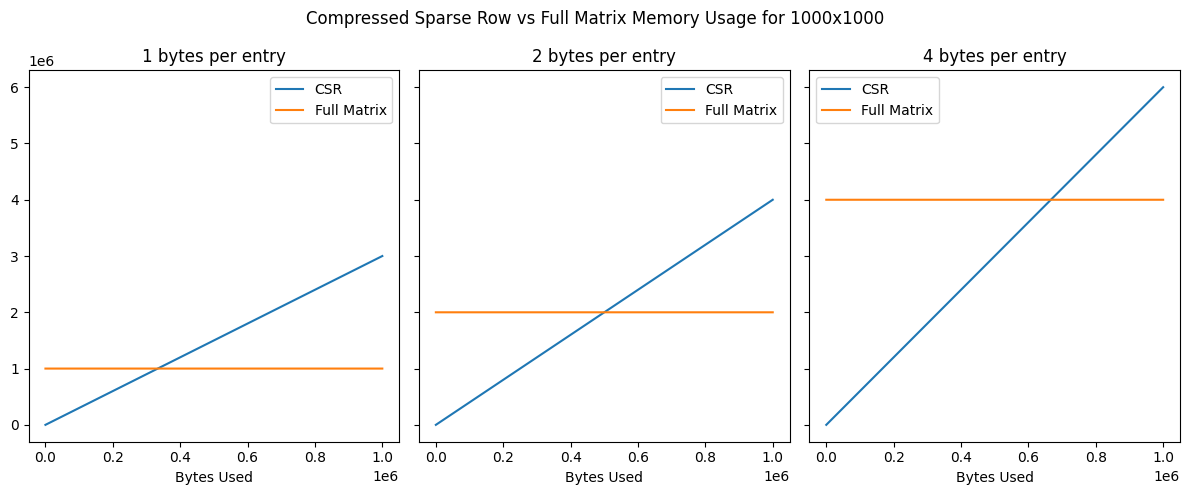

In [43]:
x = np.arange(1,1e6 + 1,1)
size = [1,2,4] # bytes per entry
fig, ax = plt.subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches(12, 5)

# Bytes used = value * number of col_indices * number of row_indices


for idx, s in enumerate(size):
    y = (x * s) + x + (x - 1)
    z = np.array([s * len(x)] * len(x))
    
    ax[idx].plot(x,y, label=f'CSR')
    ax[idx].plot(x, z, label=f'Full Matrix')
    ax[idx].set_title(f'{s} bytes per entry')
    ax[idx].legend()
    ax[idx].set_xlabel("Number of non-zero Entries")
    ax[idx].set_xlabel("Bytes Used")

fig.suptitle("Compressed Sparse Row vs Full Matrix Memory Usage for 1000x1000")
fig.tight_layout()
fig.savefig(os.path.join(git_root, 'analysis_outputs', 'reports', 'csr-vs-fullmatrix.png'))

# Parquet Before and After

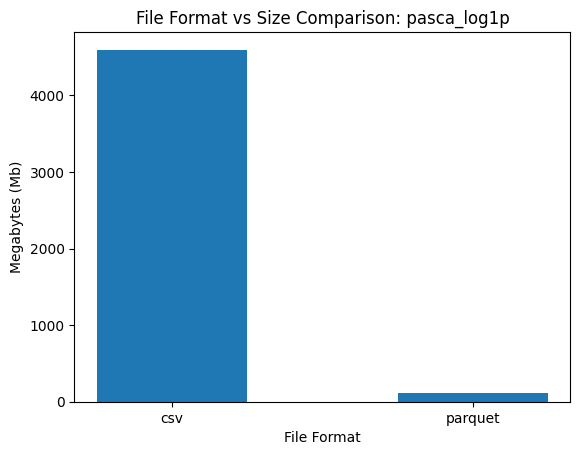

In [51]:
parquet_file = 116265778 / 1e6
csv_file = 4595246244 / 1e6
labels = ["csv", "parquet"]
heights = [csv_file, parquet_file]
plt.bar(labels, heights, width=0.5)
plt.xlabel("File Format")
plt.ylabel("Megabytes (Mb)")
plt.title("File Format vs Size Comparison: pasca_log1p")
plt.savefig(os.path.join(git_root, "analysis_outputs", "reports", "file-format-comparison.png"))

# Cumulative Memory Usage

In [69]:
with open(os.path.join(git_root, "optimized_codes/scripts/profile-new.json")) as f:
    profile = json.load(f)

functions = profile["files"]["preprocessing.py"]["functions"]
names = [f["line"] for f in functions] 
usage_fractions = [f["n_usage_fraction"] for f in functions]
peak_mb = [f["n_peak_mb"] for f in functions]
cum_mb = np.cumsum(peak_mb)

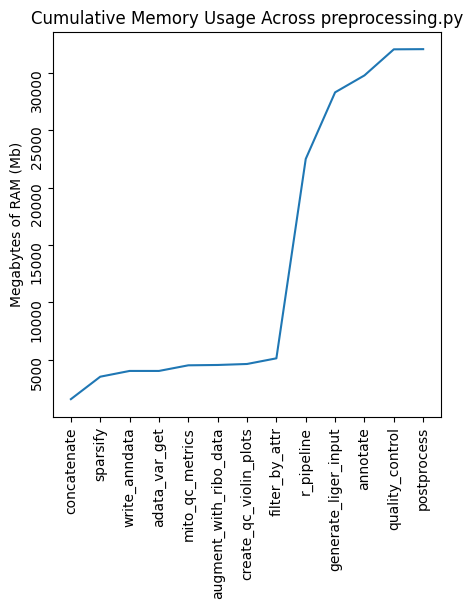

In [73]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(names, cum_mb)
ax.tick_params(rotation=90)
ax.set_ylabel("Megabytes of RAM (Mb)")
ax.set_title("Cumulative Memory Usage Across preprocessing.py")
fig.savefig(os.path.join(git_root, "analysis_outputs/reports", "cumulative-memory-usage.png"))